In [24]:
reset -f

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%config Completer.use_jedi = False

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


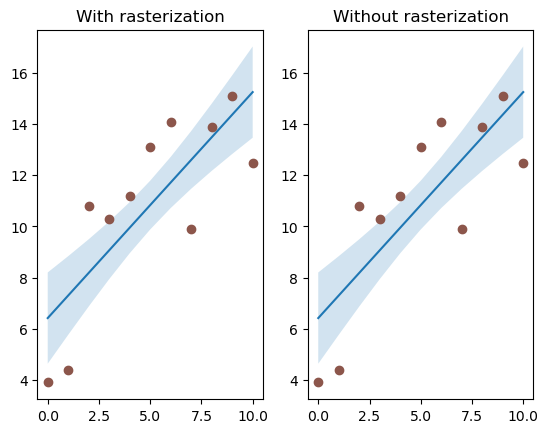

In [6]:
# Sample
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))
#
fig, ax = plt.subplots(1,2)
ax[0].plot(x, y_est, '-')
ax[0].plot(x, y, 'o', color='tab:brown')
cc = ax[0].fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
cc.set_zorder(-20)
ax[0].set_rasterization_zorder(-10)
ax[0].set_title('With rasterization')
#
ax[1].plot(x, y_est, '-')
ax[1].plot(x, y, 'o', color='tab:brown')
cc = ax[1].fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax[1].set_title('Without rasterization')

plt.savefig('line.eps')

In [5]:
# Enso index data processing
syear = 2015
eyear = 2020
dyear = eyear-syear+1
dat1   = np.loadtxt('./meiv2.data',dtype='float',skiprows=1)
MEI    = np.zeros([dyear*12,3],dtype='f')
ss = -1
# Extract data for given period
dd = dat1[:,0]
id1 = np.where((dd>=syear) & (dd<=eyear))[0]
vals = dat1[id1,:]
print(vals.shape)
MEI    = np.zeros([vals.shape[0]*12,3],dtype='f')
for i in range(vals.shape[0]):
    for j in range(12): #Month
        ss = ss+1
        MEI[ss,0] = vals[i,0]
        MEI[ss,1] = j+1
        MEI[ss,2] = vals[i,j+1]
MEI[MEI<-100] = np.nan # Replacing -999 vals
d_MEI = MEI[:,0]+(MEI[:,1]-0.5)/12

(6, 13)


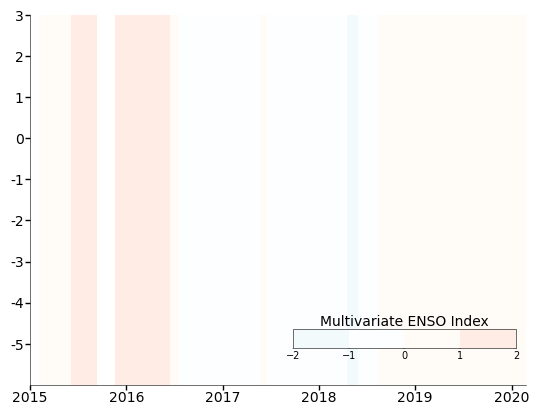

In [7]:
from matplotlib.colors import ListedColormap
from matplotlib.ticker import AutoMinorLocator,FormatStrFormatter
nws_flux_colors = ['skyblue','aliceblue','khaki','bisque', 'orangered']
basis_colormap = ListedColormap(nws_flux_colors)
clevs = np.arange(-2, 3 ,1)
years = np.arange(2015,2021)        # Years
#
Y1 = np.arange(-7, 8, 1)
X, Y = np.meshgrid(d_MEI, Y1)
Z, K = np.meshgrid(MEI[:,2], Y1)

#
fig, axs = plt.subplots(1,1)
axs.spines['top'].set_visible(False); axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_linewidth(0.4); axs.spines['left'].set_linewidth(0.4)
axs.tick_params(which='major',axis='both',pad=1,length=3.5,width=1.0,colors='k',labelsize=10)
axs.yaxis.set_major_formatter(FormatStrFormatter('%1g'))
axs.set_xlim(2015,2020.1)
axs.set_xticks(np.arange(2014.95, 2020.1, 1))
axs.set_xticklabels([])
axs.set_xticklabels(years)
axs.set_ylim(-6,3); axs.set_yticks(np.arange(-5,3.1,1))
axs.set_yticklabels([])
axs.set_yticklabels(np.arange(-5,3.1,1).astype('int'))
p = axs.contourf(X,Y,Z,levels=clevs,cmap=basis_colormap,alpha=0.1,zorder=-20)
axs.set_rasterization_zorder(-10)

#
cax = axs.inset_axes([0.53, 0.10, 0.45, 0.05], transform=axs.transAxes,zorder=-20)
cax.set_rasterization_zorder(-10)
cbar = fig.colorbar(p, ax=axs, cax=cax, orientation='horizontal')
cbar.outline.set_linewidth(0.4)
cbar.ax.tick_params(labelsize=7,length=1.0, width=0.3, pad = 1)
cbar.set_label(u'Multivariate ENSO Index',fontsize=10,labelpad=-33)

plt.savefig('test.eps')

In [ ]:
d = np.arange(100).reshape(10, 10)
x, y = np.meshgrid(np.arange(11), np.arange(11))

theta = 0.25*np.pi
xx = x*np.cos(theta) - y*np.sin(theta)
yy = x*np.sin(theta) + y*np.cos(theta)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_aspect(1)
ax1.pcolormesh(xx, yy, d)
ax1.set_title("No Rasterization")

ax2.set_aspect(1)
ax2.set_title("Rasterization")

m = ax2.pcolormesh(xx, yy, d)
m.set_rasterized(True)

ax3.set_aspect(1)
ax3.pcolormesh(xx, yy, d)
ax3.text(0.5, 0.5, "Text", alpha=0.2,
         va="center", ha="center", size=50, transform=ax3.transAxes)

ax3.set_title("No Rasterization")


ax4.set_aspect(1)
m = ax4.pcolormesh(xx, yy, d)
m.set_zorder(-20)

ax4.text(0.5, 0.5, "Text", alpha=0.2,
         zorder=-15,
         va="center", ha="center", size=50, transform=ax4.transAxes)

ax4.set_rasterization_zorder(-10)

ax4.set_title("Rasterization z$<-10$")


ax2.title.set_rasterized(True) # should display a warning

# plt.savefig("test_rasterization.pdf", dpi=150)
# plt.savefig("test_rasterization.eps", dpi=150)

# if not plt.rcParams["text.usetex"]:
#     plt.savefig("test_rasterization.svg", dpi=150)
#     # svg backend currently ignores the dpi